<a href="https://colab.research.google.com/github/pavithra64/air-bnb-bookings/blob/main/Airbnb_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - AirBnb Bookings Analysis
Project Type - EDA
Contribution - Individual
Individual - Namira Mujawar
Project Summary -
The project is an exploratory data analysis (EDA) of Airbnb bookings data, aimed at gaining insights into the patterns and trends of the Airbnb market. The dataset includes information about Airbnb bookings in a particular location, such as the listing description, the booking date, room type,review, and the price.

The project will begin by cleaning and preprocessing the data, handling any missing or incorrect values, and transforming the data into a usable format for analysis. The next step will be to conduct a comprehensive analysis of the data, using descriptive statistics, visualization tools, and statistical techniques to identify patterns and trends in the data.

The analysis will focus on answering questions such as:

What is the distribution of Airbnb listings by location, price, and availability?
What factors influence the price of Airbnb listings?
What is the seasonal pattern of Airbnb bookings?
What are the most popular neighborhoods for Airbnb bookings?
The project will conclude by summarizing the findings and providing insights that can be used to optimize Airbnb bookings, improve customer experience, and increase profitability for Airbnb hosts.


# Problem Statement
Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data data that can be analysed and used for security, business decisions, understanding of customers and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

 Chart visualization code:
        
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 20 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

Let's Begin !
# 1. Know Your Data

# Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-ff1166e50fda>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


# Dataset Loading

In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving Airbnb NYC 2019.csv to Airbnb NYC 2019.csv


In [89]:
Airbnb = pd.read_csv('Airbnb NYC 2019.csv')

**Dataset First View**

In [101]:
# Dataset First Look
Airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [102]:
#Bottom 5 rows of dataset
Airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [103]:
Airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [104]:
# DataType of each columns
Airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Dataset Rows & Columns count**

In [105]:
# Dataset Rows & Columns count
Airbnb.shape

(48895, 16)

**Dataset Information**

In [106]:
# Dataset Info
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Duplicate Values**

In [107]:
# Dataset Duplicate Value Count
len(Airbnb[Airbnb.duplicated()])

0

In [108]:
# sum of the dublicate values
Airbnb.duplicated().sum()

0

In [109]:
#remove duplicate values from the dataset
Airbnb.drop_duplicates(inplace=True)

**Missing Values/Null Values**

In [110]:
# Missing Values/Null Values Count
print(Airbnb.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [111]:
# Visualizing the missing values
Airbnb.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [112]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(Airbnb.isnull(), cbar=False)

<Axes: >

What did you know about your dataset?
Airbnb booking analysis dataset typically contains information about Airbnb bookings in a particular location, including the listing description, booking date, number of guests, price, and other related attributes.Dataset consist of 48895 rows and 16 columns.

Some attributes found in the Airbnb booking analysis dataset include:

Booking information
Pricing information
Reviews and ratings
Host information
The dataset can be used to conduct a variety of analyses, such as understanding the market demand, optimizing the pricing strategy, improving customer experience, and identifying new business opportunities in the Airbnb market. It can also be used to develop predictive models that can help to forecast future demand and optimize the Airbnb business.

# 2. Understanding Your Variables

In [113]:
# Dataset Columns
Airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [114]:
#Dataset Columns
for col in Airbnb.columns:
    print(col)


id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [115]:
# Dataset Describe
Airbnb_dataframe = pd.DataFrame(Airbnb)

print(Airbnb_dataframe.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [116]:
# Dataset Describe
Airbnb.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47896,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,23-06-2019,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


# Variables Description
Variables found in an Airbnb booking analysis dataset:

Host ID: A unique identifier for the Airbnb host.

Listing name: The name of the Airbnb listing. Neighborhood: The neighborhood where the Airbnb listing is located.

Latitude and Longitude: The geographical coordinates of the Airbnb listing.

Room type: The type of room available for booking, such as private room, shared room or entire home/apartment.

Price: The nightly price of the Airbnb listing.

Minimum nights: The minimum number of nights required to book the Airbnb listing.

Ratings: The overall rating and review scores of the Airbnb listing, as rated by previous guests.

Host response rate: The rate at which the Airbnb host responds to inquiries and booking requests.

**Check Unique Values for each variable**

In [117]:
# Check Unique Values for each variable.
for i in Airbnb.columns.tolist():
  print("No. of unique values in ",i,"is",Airbnb[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47896 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


# 3. Data Wrangling


In [118]:
# Write your code to make your dataset analysis ready.
#Drop unnecessary columns
Airbnb.drop(['name','id','host_name','last_review'], axis=1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [119]:
#Examining Changes
Airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [120]:
#Rreplace the 'reviews per month' by zero
Airbnb.fillna({'reviews_per_month':0})
#examing changes
Airbnb.reviews_per_month.isnull().sum()

10052

In [121]:
#Remove the NaN values from the dataset
Airbnb.isnull().sum()
Airbnb.dropna(how='any',inplace=True)
Airbnb.info() #.info() function is used to get a abbreviate summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [122]:
#Examine Continous Variables
Airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [123]:
#Print all the columns names
Airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [124]:
# Importing datetime modules
from datetime import datetime
from datetime import date


def parse_string_to_date(datestring):

  return convert_to_year(datestring)

In [125]:
Airbnb['last_review'] = pd.to_datetime(Airbnb['last_review'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [126]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  number_

In [127]:
# to change the data type of price to integer
Airbnb['price'] = Airbnb['price'].astype(int)

In [128]:
# to get the mean price by neighbourhood
Airbnb.groupby('neighbourhood')['price'].mean()

neighbourhood
Allerton            90.594595
Arden Heights       67.250000
Arrochar           118.250000
Arverne            158.515152
Astoria            116.018336
                      ...    
Willowbrook        249.000000
Windsor Terrace    130.687500
Woodhaven           62.722222
Woodlawn            60.090909
Woodside            89.852941
Name: price, Length: 218, dtype: float64

In [129]:
# to create a new column for price per bedroom
Airbnb['availability_of_the_rooms_per_min_nights'] = Airbnb['availability_365'] / Airbnb['minimum_nights']
print(Airbnb['availability_of_the_rooms_per_min_nights'])

0        365.0
1        355.0
3        194.0
4          0.0
5         43.0
         ...  
48782    147.0
48790    339.0
48799     87.0
48805     40.0
48852      1.0
Name: availability_of_the_rooms_per_min_nights, Length: 38821, dtype: float64


In [130]:
Airbnb.drop(Airbnb.index[729], inplace=True)

In [131]:
# Let's check the column 'last review'

Airbnb['last_review']

0       NaT
1       NaT
3       NaT
4       NaT
5       NaT
         ..
48782   NaT
48790   NaT
48799   NaT
48805   NaT
48852   NaT
Name: last_review, Length: 38820, dtype: datetime64[ns]

 So 'last review' is a date column, we'll fix that. Also, we'll impute the null values with the very first date in this listing, denoting that the listing has almost never been reviewed

In [132]:
Airbnb['last_review'] = pd.to_datetime(Airbnb['last_review'])

In [133]:
# Let's check the min and max timestamps

Airbnb['last_review'].min(), Airbnb['last_review'].max()

(NaT, NaT)

 the max date of review is the year 2058. Let's find out how many such bogus dates are there, and fix them

In [134]:
Airbnb[Airbnb['last_review'].apply(lambda x: x.year) > 2022]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_of_the_rooms_per_min_nights


In [135]:
#let's change these wrong review dates to the median review date, giving benefit of doubt to the host

Airbnb.loc[Airbnb[Airbnb['last_review'].apply(lambda x: x.year) > 2022].index, 'last_review'] = Airbnb['last_review'].median()

In [136]:
# Now let's impute the null values to the minimum date in the dataset

Airbnb.loc[Airbnb['last_review'].isnull(), 'last_review'] = Airbnb['last_review'].median()

In [137]:
Airbnb[Airbnb.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_of_the_rooms_per_min_nights


In [138]:
Airbnb.drop_duplicates(keep='first', inplace=True)

In [139]:
Airbnb.duplicated(subset=['host_name', 'latitude', 'longitude', 'price']).sum()

0

In [140]:
# find these duplicate entries and manually confirm our hunch

temp = Airbnb.loc[Airbnb.duplicated(subset=['host_name', 'latitude', 'longitude', 'price'], keep=False)].copy()
temp = temp.groupby(['host_name', 'latitude', 'longitude', 'price'])
for key, subdf in temp:
    print(key)
    print(pd.DataFrame(subdf), '\n')
    break

# Assign subdf to the global namespace
global subdf

# Delete temp variable
del temp

# Drop duplicate entries
Airbnb.drop_duplicates(subset=['host_name', 'latitude', 'longitude', 'price'], inplace=True)

In [141]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48852
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        38820 non-null  int64         
 1   name                                      38820 non-null  object        
 2   host_id                                   38820 non-null  int64         
 3   host_name                                 38820 non-null  object        
 4   neighbourhood_group                       38820 non-null  object        
 5   neighbourhood                             38820 non-null  object        
 6   latitude                                  38820 non-null  float64       
 7   longitude                                 38820 non-null  float64       
 8   room_type                                 38820 non-null  object        
 9   price                            

In [142]:
Airbnb.isnull().sum().sort_values(ascending=False)

last_review                                 38820
id                                              0
price                                           0
availability_365                                0
calculated_host_listings_count                  0
reviews_per_month                               0
number_of_reviews                               0
minimum_nights                                  0
room_type                                       0
name                                            0
longitude                                       0
latitude                                        0
neighbourhood                                   0
neighbourhood_group                             0
host_name                                       0
host_id                                         0
availability_of_the_rooms_per_min_nights        0
dtype: int64

In [143]:
Airbnb['reviews_per_month'].min(), Airbnb['reviews_per_month'].max()

(0.01, 58.5)

In [144]:
#median to impute the column

Airbnb.loc[Airbnb['reviews_per_month'].isnull(), 'reviews_per_month'] = 0.79

In [145]:
# check the variability in the columns of dataframe

for col in Airbnb.columns:
    print(f'Column {col} \t has {Airbnb[col].nunique()} unique values')

Column id 	 has 38820 unique values
Column name 	 has 38243 unique values
Column host_id 	 has 30231 unique values
Column host_name 	 has 9885 unique values
Column neighbourhood_group 	 has 5 unique values
Column neighbourhood 	 has 218 unique values
Column latitude 	 has 17436 unique values
Column longitude 	 has 13639 unique values
Column room_type 	 has 3 unique values
Column price 	 has 581 unique values
Column minimum_nights 	 has 89 unique values
Column number_of_reviews 	 has 393 unique values
Column last_review 	 has 0 unique values
Column reviews_per_month 	 has 937 unique values
Column calculated_host_listings_count 	 has 47 unique values
Column availability_365 	 has 366 unique values
Column availability_of_the_rooms_per_min_nights 	 has 2481 unique values


In [146]:
# Let's check the host_identity_verified value count

Airbnb.host_name.value_counts()

host_name
Michael           335
David             309
John              250
Alex              229
Sonder (NYC)      207
                 ... 
Krisztián           1
Kila                1
Maisha              1
Martin & Hande      1
Rusaa               1
Name: count, Length: 9885, dtype: int64

In [147]:
# Let's check the neighbourhood group values

Airbnb['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        16620
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [148]:
Airbnb.neighbourhood.value_counts().sort_values(ascending=False)[:10]

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1488
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: count, dtype: int64

In [149]:
# Impute NAME column with 'blank'
Airbnb.loc[Airbnb['name'].isnull(), 'name'] = 'blank'

# Impute host id with 0
Airbnb.loc[Airbnb['host_id'].isnull(), 'host_id'] = 0


# Impute host name with 'blank'
Airbnb.loc[Airbnb['host_name'].isnull(), 'host_name'] = 'blank'

In [150]:
Airbnb.loc[Airbnb['neighbourhood_group']=='manhatan', 'neighbourhood_group'] = 'Manhattan'
Airbnb.loc[Airbnb['neighbourhood_group']=='brookln', 'neighbourhood_group'] = 'Brooklyn'

In [151]:
#We impute availability 365 with median value 127
Airbnb['availability_365'] = Airbnb['availability_365'].fillna(127)

In [152]:
# Let us clip the data between 0 and 4th quartile
Airbnb['minimum_nights'].min(), Airbnb['minimum_nights'].max()

(1, 1250)

In [153]:
# Let's impute the 'minimum nights' feature with the median 3

Airbnb['minimum_nights'] = Airbnb['minimum_nights'].fillna(3)

In [154]:
Airbnb.price.mean()

142.3284904688305

In [155]:
# Impute the price with mean
Airbnb.price.fillna(Airbnb.price.mean(), inplace=True)


Airbnb.isnull().sum().sort_values(ascending=False)


combined_df = pd.DataFrame(columns=['name', 'host_id', 'longitude', 'latitude', 'neibourhood', 'neibourhood_group'])


combined_df - pd.DataFrame(columns=['name', 'host_id', 'price', '', 'number_of_reviews', 'minimum_nights'])


combined_df.head()


idx = Airbnb.loc[Airbnb.neighbourhood.isnull()].index
Airbnb.loc[idx, 'neighbourhood'] = Airbnb.loc[idx].apply(lambda x: \
                                                loc_from_coord(x.lat, x.long), axis=1)

In [156]:
Airbnb.loc[idx].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_of_the_rooms_per_min_nights


In [157]:
#which roomtype has a demand

prf_areas = Airbnb.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].count().reset_index()
prf_areas = prf_areas.sort_values(by='minimum_nights', ascending=False)
prf_areas.head (3)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,9961
3,Brooklyn,Entire home/apt,8159
4,Brooklyn,Private room,7990


In [158]:
#Maximum price

Airbnb.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'], ascending = False).rename(columns = {'price': 'Maximum price', 'neighbourhood_group':'Area'})


,Area,Maximum price
1,Brooklyn,10000
3,Queens,10000
2,Manhattan,9999
0,Bronx,800
4,Staten Island,625


In [159]:
#area vise maximum price

max_price_Airbnb = Airbnb.groupby('neighbourhood_group', as_index=False)['price'].max().sort_values(['price'], ascending = True).rename (columns= {'price': 'Maximum price', 'neighbourhood_group':'Area'})


In [160]:
max_price_Airbnb

,Area,Maximum price
4,Staten Island,625
0,Bronx,800
2,Manhattan,9999
1,Brooklyn,10000
3,Queens,10000


In [161]:
#area wise minimum price

min_price_Airbnb = Airbnb.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'], ascending = True).rename(columns={"price":"Minimum price", 'neighbourhood_group':'Area'})
min_price_Airbnb

,Area,Minimum price
0,Bronx,0
1,Brooklyn,0
2,Manhattan,10
3,Queens,10
4,Staten Island,13


In [162]:
merge_price_Airbnb = pd.merge(max_price_Airbnb,min_price_Airbnb,on='Area')

In [163]:
merge_price_Airbnb

,Area,Maximum price,Minimum price
0,Staten Island,625,13
1,Bronx,800,0
2,Manhattan,9999,10
3,Brooklyn,10000,0
4,Queens,10000,10


In [164]:
#top 10 hosts who have most reviews
most_reviews_Airbnb = Airbnb.groupby(['host_name', 'room_type', 'neighbourhood_group', 'neighbourhood'])['number_of_reviews'].max().reset_index()
most_reviews_Airbnb = most_reviews_Airbnb.sort_values(by='number_of_reviews', ascending=False).head(18)

most_reviews_Airbnb

,host_name,room_type,neighbourhood_group,neighbourhood,number_of_reviews
6798,Dona,Private room,Queens,Jamaica,629
12145,Jj,Private room,Manhattan,Harlem,607
17547,Maya,Private room,Queens,East Elmhurst,543
4201,Carol,Private room,Manhattan,Lower East Side,540
5970,Danielle,Private room,Queens,East Elmhurst,510
2552,Asa,Entire home/apt,Brooklyn,Park Slope,488
26002,Wanda,Private room,Brooklyn,Bushwick,480
15430,Linda,Private room,Queens,Flushing,474
5821,Dani,Entire home/apt,Brooklyn,South Slope,467
1861,Angela,Private room,Queens,East Elmhurst,466


In [165]:
#Average price of property based on location and Room type
avg_price = Airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index().rename(columns={'neighbourhood_group':'Area'})

In [166]:
avg_price

,Area,room_type,price
0,Bronx,Entire home/apt,120.938312
1,Bronx,Private room,57.093511
2,Bronx,Shared room,56.930233
3,Brooklyn,Entire home/apt,171.281897
4,Brooklyn,Private room,73.349562
5,Brooklyn,Shared room,45.458621
6,Manhattan,Entire home/apt,230.194057
7,Manhattan,Private room,106.607488
8,Manhattan,Shared room,77.980337
9,Queens,Entire home/apt,139.225603


In [167]:
Airbnb_concat = pd.concat([min_price_Airbnb,max_price_Airbnb],axis=0)
Airbnb_concat

,Area,Minimum price,Maximum price
0,Bronx,0.0,NaN
1,Brooklyn,0.0,NaN
2,Manhattan,10.0,NaN
3,Queens,10.0,NaN
4,Staten Island,13.0,NaN
4,Staten Island,NaN,625.0
0,Bronx,NaN,800.0
2,Manhattan,NaN,9999.0
1,Brooklyn,NaN,10000.0
3,Queens,NaN,10000.0


In [168]:
Airbnb_concat1 = pd.concat([min_price_Airbnb,max_price_Airbnb],axis=1)
Airbnb_concat1

,Area,Minimum price,Area,Maximum price
0,Bronx,0,Bronx,800
1,Brooklyn,0,Brooklyn,10000
2,Manhattan,10,Manhattan,9999
3,Queens,10,Queens,10000
4,Staten Island,13,Staten Island,625


What all manipulations have you done and insights you found?

**Data Wrangling Techniques:**

**Handling missing values:** Missing values can be handled using techniques such as imputation, substitution, or removal.

**Removing duplicates:** Duplicates can be removed to ensure that the analysis is based on unique data points.

**Handling outliers:** Outliers can be handled by removing or replacing them with more appropriate values.

**Converting data types:** The data types of the variables can be converted to ensure that they are in a consistent format for analysis.

**Merging and splitting data:** Data can be merged or split to create new variables or group data points for analysis.

**Insights from Airbnb Booking Analysis Data:**

**Price distribution:** The analysis can provide insights into the distribution of prices for Airbnb listings in a particular location, identifying the range and median prices.

**Seasonal patterns:** The analysis can reveal the seasonal patterns of Airbnb bookings, such as peak booking periods during holidays or special events.

**Location preferences:** The analysis can identify the most popular neighborhoods or locations for Airbnb bookings, as well as the factors that influence these preferences.

**Customer ratings and reviews:** The analysis can provide insights into the overall satisfaction of customers with Airbnb listings, based on their ratings and reviews.

These insights can help to optimize the Airbnb business, improve customer experience, and increase profitability for Airbnb hosts.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

room_type
Entire home/apt    20320
Private room       17654
Shared room          846
Name: count, dtype: int64
 


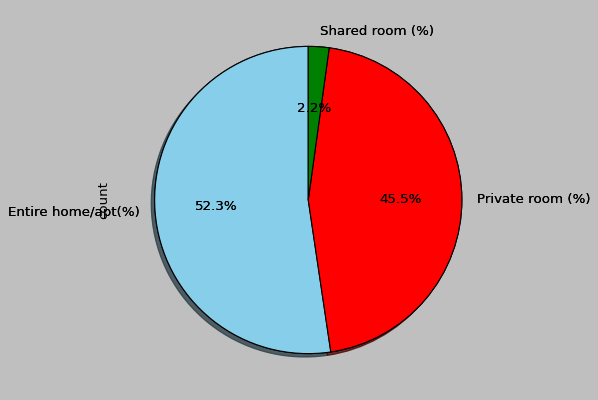

In [184]:
# Chart - 1 visualization code
print(Airbnb.room_type.value_counts())
print(" ")
# Dependant Variable Column Visualization
Airbnb['room_type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Entire home/apt(%)','Private room (%)','Shared room (%)'],
                               colors=['skyblue','red','green'],
                               explode=[0,0,0]
                              )
plt.show()

**1. Why did you pick the specific chart?**

A pie chart is a circular chart that is divided into slices to represent the proportion of each category in a dataset. In the case of Airbnb booking analysis, the pie chart can be used to visualize the proportion of each room type available for booking, such as private room, shared room, or entire home/apartment.

The pie chart is a suitable visualization for this variable because it allows viewers to quickly understand the relative proportions of each room type. The circular shape of the chart makes it easy to compare the sizes of each slice, and the use of different colors or labels can help to distinguish each category.

**2. What is/are the insight(s) found from the chart?**

In Airbnb booking analysis, maximum people gave prefrance to book entire home and apartment with 52.3%,on the second position private rooms are booked by the customer with 45.5%. And only 2.2% people booked shared rooms.

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

The positive business impact of this insight from Airbnb booking analysis is that it can help the company and its hosts to optimize their listings and increase profitability.

Firstly, the fact that more than half of the customers prefer to book entire homes and apartments can provide insights into the demand for larger and more private spaces. Hosts can use this information to adjust their listings to better cater to this demand, such as by offering more spacious or luxurious accommodations. This can help hosts to attract more bookings and potentially increase their revenue.

Secondly, the high demand for private rooms can also provide opportunities for hosts to offer more personalized services and experiences to their guests. Hosts can provide amenities and services that are tailored to the preferences of their guests, such as providing local recommendations or offering personalized tours. This can help to improve customer satisfaction and loyalty, and potentially lead to repeat bookings and positive reviews.

Finally, the low demand for shared rooms can provide insights into the types of accommodations that are less popular among customers. Hosts can use this information to adjust their listings or pricing strategies to better reflect customer preferences, which can help to increase their occupancy rates and revenue.

In summary, the insight that customers prefer to book entire homes and apartments and private rooms can provide valuable insights for hosts and Airbnb to optimize their listings and improve profitability by catering to customer preferences.

**Chart - 2** neighbourhood_group Vs. calculated_host_listings_count(Bivariate with Categorical - Numerical)

  neighbourhood_group  Average booking %
0           Manhattan         877.460890
1              Queens         335.542432
2       Staten Island         238.853503
3            Brooklyn         223.353002
4               Bronx         220.571429
 


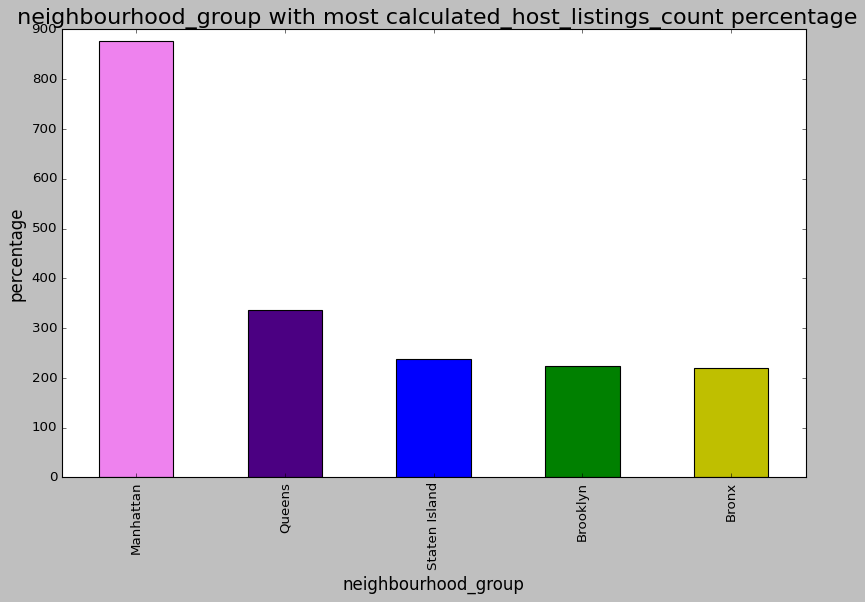

In [185]:
# Chart - 2 visualization code
#  Showing Average calculated_host_listings_count Percentage wise
# Showing top neighbourhood_group

print((Airbnb.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean()*100).sort_values(ascending = False).reset_index(name="Average booking %").head(10))
print(" ")


# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((Airbnb.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" neighbourhood_group with most calculated_host_listings_count percentage", fontsize = 20)
plt.xlabel('neighbourhood_group', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [186]:
#  Showing Average calculated_host_listings_count Percentage wise
# Showing top neighbourhood_group
print((Airbnb.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean()*100).sort_values(ascending = True).reset_index(name="Average Room_type %").head(10))
print(" ")



# State vs. average true churn percantage visualization code
# Vizualizing bottom 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((Airbnb.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" neighbourhood_group with most calculated_host_listings_count ", fontsize = 20)
plt.xlabel('neighbourhood_group', fontsize = 15)
plt.ylabel('count_of_booking', fontsize = 15)

  neighbourhood_group  Average Room_type %
0               Bronx           220.571429
1            Brooklyn           223.353002
2       Staten Island           238.853503
3              Queens           335.542432
4           Manhattan           877.460890
 


Text(0, 0.5, 'count_of_booking')

1. Why did you pick the specific chart?
A bar plot chart between calculated_host_listings_count and neighbourhood_group can be useful in visualizing the distribution of the number of listings by host in each neighborhood group. The calculated_host_listings_count column represents the number of listings by a particular host in the Airbnb platform, while the neighbourhood_group column represents the different groups of neighborhoods in a particular city.

By plotting a bar plot chart between these two variables, we can quickly see which neighborhood group has the highest number of listings per host and which has the lowest. It can also help identify any outliers in the data, such as hosts with an unusually high or low number of listings.

This information can be helpful for both hosts and guests. Hosts can use this information to see how their listing(s) compare to other hosts in their neighborhood group, while guests can use this information to make more informed decisions when selecting a neighborhood to stay in based on the number of available listings per host.

2. What is/are the insight(s) found from the chart?
According to the Airbnb dataset we can see people gave maximum prefrance to the Manattan neighborhood(more than 800), On the second position Queens neighborhood(more than 200).Neighborhood like Boronx, Brooklyn and Staten Island have almost similar count of bookings.

3. Will the gained insights help creating a positive business impact?
The positive business impact of this information for Airbnb could be that it helps them understand the most popular and in-demand neighborhoods for their users. This information can help Airbnb make informed decisions about where to focus their marketing efforts and investment in terms of adding new listings or improving existing ones.

For example, by knowing that Manhattan and Queens are the most popular neighborhoods, Airbnb can prioritize acquiring more listings in those areas, as they are likely to generate the highest bookings and revenue. Similarly, Airbnb can work to improve the quality of listings in these neighborhoods to ensure that guests have a positive experience, leading to more repeat bookings and positive reviews.

Additionally, this information can help Airbnb optimize their pricing strategy in different neighborhoods. They can use this information to set prices that reflect the demand for each neighborhood and adjust prices during peak times to maximize revenue.

There may be some potential negative business impacts for Airbnb based on this information as well.

Firstly, if there are limited listings in the most popular neighborhoods such as Manhattan and Queens, it may lead to increased competition among hosts and potentially result in higher prices for guests. This could lead to guests choosing alternative accommodation options or even choosing to stay in less popular neighborhoods with more affordable prices.

Additionally, if the popularity of certain neighborhoods changes over time, Airbnb may need to shift their strategy and resources to adapt to these changes. For example, if a once-popular neighborhood becomes less in demand, Airbnb may need to consider reducing their investment in that area and focusing on other neighborhoods instead.

Another potential negative impact is that hosts in less popular neighborhoods may feel neglected or undervalued by Airbnb, which may affect their motivation to continue listing their properties on the platform. Airbnb may need to find ways to incentivize hosts in these neighborhoods to keep their listings active and attract more guests to these areas.

Overall, while understanding the booking preferences of users in different neighborhoods can be valuable for Airbnb, it is important for the company to carefully consider both the positive and negative impacts of this information on their business and their users.

**Chart - 3** Price with room_type(Univariate)

room_type      
Entire home/apt    19770
Private room       16748
Shared room          711
Name: count, dtype: int64
 


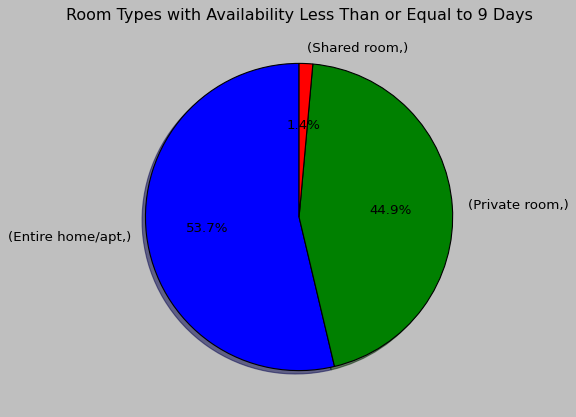

In [198]:
# Chart - 3 visualization code
print(Airbnb[Airbnb['availability_365']<=359].loc[:,['room_type']].value_counts())
print(" ")

# Assuming you want to set shadow to True, correct the typo:
Airbnb[Airbnb['availability_365']<=9].loc[:,['room_type']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True)  # Set shadow to True

plt.title('Room Types with Availability Less Than or Equal to 9 Days')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()

A pie chart is a circular chart that is divided into slices to represent the proportion of each category in a dataset. In the case of Airbnb booking analysis, the pie chart can be used to visualize the proportion of each room type available for booking, such as private room, shared room, or entire home/apartment.

The pie chart is a suitable visualization for this variable because it allows viewers to quickly understand the relative proportions of each room type. The circular shape of the chart makes it easy to compare the sizes of each slice, and the use of different colors or labels can help to distinguish each category.

2. What is/are the insight(s) found from the chart?
A pie chart of number of reviews can provide insights into the popularity of accommodations. It can show the proportion of accommodations that have a certain number of reviews, which can be useful for understanding which accommodations are most frequently booked and reviewed. For example, it may show that a large proportion of accommodations have fewer than 10 reviews, or that a small proportion have a very large number of reviews.

A pie chart of room type can provide insights into the distribution of different types of accommodations. It can show the proportion of accommodations that are private rooms, shared rooms, or entire homes or apartments, which can be useful for understanding the different types of accommodations that are available and which types are most popular. For example, it may show that most accommodations are entire homes or apartments, or that there is a relatively even distribution of different types of accommodations.

3. Will the gained insights help creating a positive business impact?
Insights from a pie chart of price can help businesses determine which price ranges are most popular among Airbnb users. This can help them decide whether they should adjust their pricing strategy to make their accommodations more competitive in the market. For example, if the pie chart shows that a large proportion of accommodations fall into the mid-range price category, a business may want to consider lowering their prices to make their accommodations more attractive to customers.

Insights from a pie chart of number of reviews can help businesses understand the popularity of their accommodations and how they compare to competitors. If the pie chart shows that a large proportion of accommodations have a high number of reviews, a business may want to prioritize getting more reviews in order to stay competitive. On the other hand, if the pie chart shows that many accommodations have fewer reviews, a business may be able to gain a competitive advantage by actively soliciting more reviews from satisfied customers.

Insights from a pie chart of room type can help businesses understand the types of accommodations that are most popular among Airbnb users. If the pie chart shows that most accommodations are entire homes or apartments, a business may want to consider focusing on that type of accommodation to appeal to a larger customer base. On the other hand, if the pie chart shows that shared rooms or private rooms are more popular, a business may want to consider offering more of those types of accommodations to stay competitive in the market.

**Chart - 4**

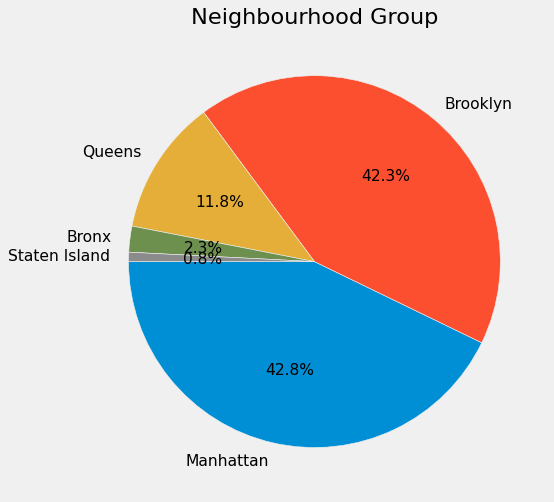

In [199]:
# Chart - 4 visualization code
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(Airbnb.neighbourhood_group.value_counts(), labels=Airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

1. Why did you pick the specific chart?
A pie chart is a circular chart that is divided into slices to represent the proportion of each category in a dataset. In the case of Airbnb booking analysis, the pie chart can be used to visualize the proportion of each room type available for booking, such as private room, shared room, or entire home/apartment.

The pie chart is a suitable visualization for this variable because it allows viewers to quickly understand the relative proportions of each room type. The circular shape of the chart makes it easy to compare the sizes of each slice, and the use of different colors or labels can help to distinguish each category.

2. What is/are the insight(s) found from the chart?
As we can see Manhattan neighourhood is more popular in people with 46.0%, Brooklyn neighourhood is at second position with percentage 44.4,third most neighourhood in people is Queens,then Bronx and Staten Island respectively.

3. Will the gained insights help creating a positive business impact?
The insights gained from the pie chart of the popularity of different neighborhoods in New York City, specifically that Manhattan and Brooklyn are the most popular neighborhoods among Airbnb users, can certainly help create a positive business impact for a business operating in the hospitality industry in New York City.

For example, if a business is looking to expand its operations and add new properties to its portfolio, the insights from the pie chart can inform where the business should focus its efforts. Based on the popularity of Manhattan and Brooklyn, a business may want to prioritize acquiring properties in those neighborhoods to appeal to the largest customer base.

Additionally, the insights gained from the pie chart can inform a business's marketing strategy. If a business has properties in both Manhattan and Brooklyn, it may want to highlight the popularity of those neighborhoods in its marketing materials to attract more customers. This can help the business stand out from competitors and increase its bookings.

Overall, the insights gained from the pie chart can certainly help a business create a positive impact by making data-driven decisions to improve its operations and appeal to the largest customer base possible.

**Chart - 5**

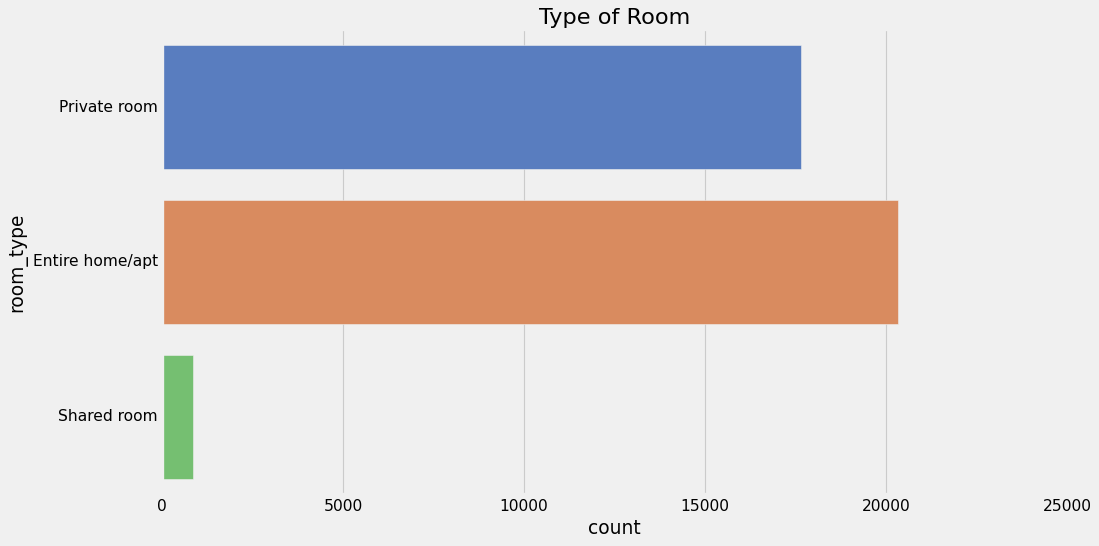

In [174]:
# Chart - 5 visualization code
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(Airbnb.room_type, palette="muted")
fig = plt.gcf()
plt.show()

1. Why did you pick the specific chart?
Bar charts are a commonly used visualization tool that are easy to understand and interpret. They are effective in displaying categorical data and can show the relative size of each category.

Bar charts can be used to compare data between different categories, which makes them useful for comparing bookings between different room types.

Bar charts are customizable and can be used to display additional information, such as the total number of bookings or the percentage of bookings for each room type.

Bar charts can also be used to show changes in data over time, by creating a stacked bar chart that shows the breakdown of bookings by room type for each time period.

2. What is/are the insight(s) found from the chart?
7000 above people gave prefarance to book entire hone/apt,and 5000 pluse people booked private rooms and only few people booked shared rooms in airbnb booking.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:
By understanding that most users prefer to book entire homes or apartments, Airbnb can adjust their supply to meet the demand and encourage more hosts to list their entire properties. This can help improve the user experience and increase customer satisfaction, which can lead to repeat business and positive reviews. Airbnb can also invest in targeted marketing campaigns to promote the booking of entire homes or apartments, which can lead to an increase in bookings and revenue.

Negative impact:
If Airbnb does not have enough supply of entire homes or apartments to meet the high demand, it can result in frustrated customers who may opt to use other platforms to book their accommodations. This can lead to a loss of revenue for Airbnb and damage to their reputation. The low demand for shared rooms can also have a negative impact if Airbnb has invested heavily in this area. For example, if Airbnb has launched marketing campaigns to promote shared rooms, but the demand remains low, it can result in a waste of resources and a negative return on investment.

**Chart - 6**

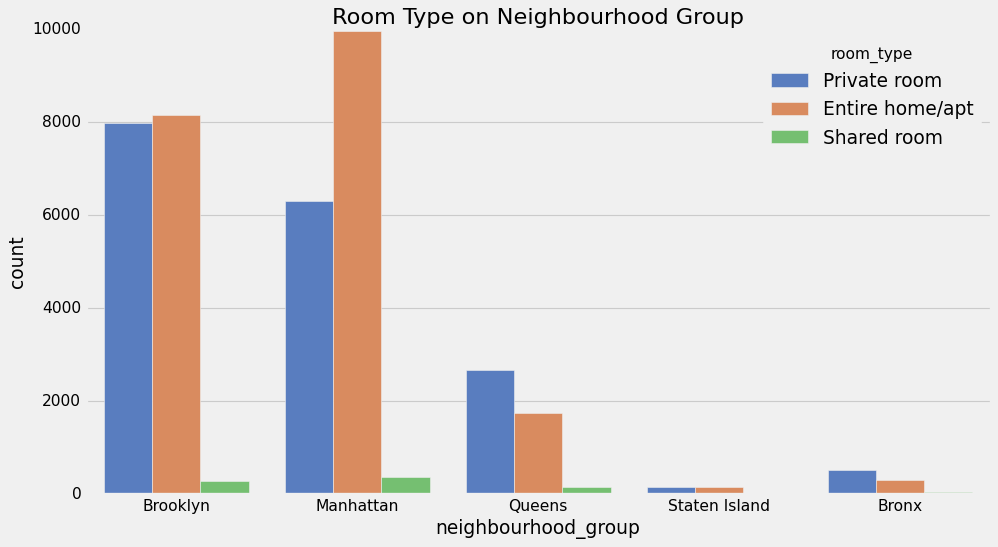

In [175]:
# Chart - 6 visualization code
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data=Airbnb, x="neighbourhood_group", hue="room_type", palette="muted")
plt.show()

1. Why did you pick the specific chart?

A multi-bar graph could be useful in visualizing the distribution of bookings across different neighborhoods, providing a clear comparison of the popularity of each area.

2. What is/are the insight(s) found from the chart?

Insights gained from a multi-bar graph of neighborhood and count of bookings in an Airbnb booking analysis can include identifying the most popular and least popular neighborhoods, understanding which neighborhoods have the highest and lowest demand for Airbnb accommodations, and helping hosts and property managers adjust their pricing, marketing and listing strategies accordingly.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from a multi-bar graph of neighborhood and count of bookings in an Airbnb booking analysis can help create a positive or negative business impact. By understanding which neighborhoods have the highest and lowest demand, hosts and property managers can adjust their pricing, marketing and listing strategies to optimize revenue and improve customer satisfaction. However, if certain neighborhoods are consistently underperforming, it may be necessary to reevaluate the suitability of those areas for Airbnb accommodations.

**Chart - 7**

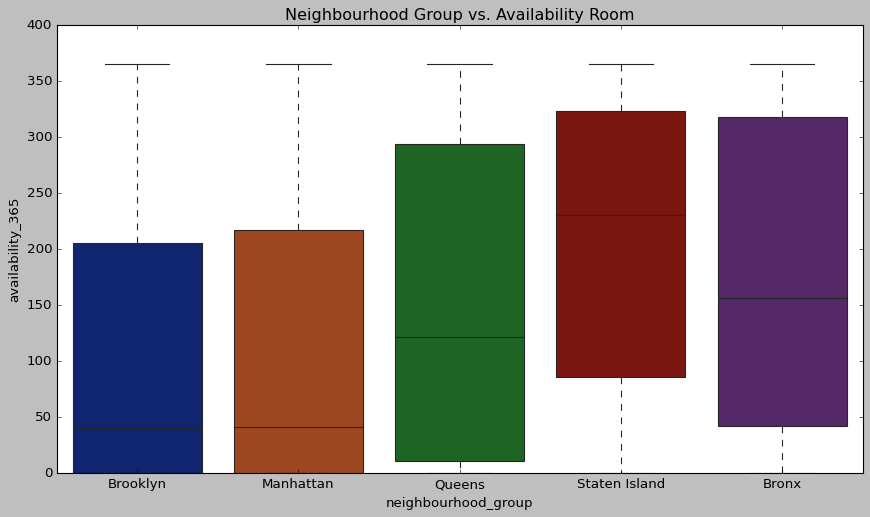

In [176]:
# Chart - 7 visualization code
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=Airbnb, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

1. Why did you pick the specific chart?
I chose boxplots for the analysis of neighborhood versus availability of rooms in Airbnb bookings because boxplots are an effective way to summarize and visualize the distribution of a dataset, particularly when comparing groups. They allow for easy identification of outliers and the examination of quartiles, median, and range of values. In this case, boxplots can help identify any differences in the availability of rooms across different neighborhoods and provide insights into potential patterns or trends that can inform decision-making for both hosts and guests.

2. What is/are the insight(s) found from the chart?
Identifying neighborhoods with consistently high or low availability, uncovering seasonal availability patterns, or detecting any potential outliers that may require further investigation.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of neighborhood versus availability of rooms in Airbnb bookings using boxplots can have both positive and negative impacts on the business. On the positive side, identifying neighborhoods with consistently high availability can help hosts make informed decisions on pricing and marketing strategies, ultimately increasing their revenue. On the negative side, discovering neighborhoods with low availability may negatively impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings. Overall, the insights gained from the analysis can help inform strategic decision-making for both hosts and Airbnb as a business.

**Chart - 8**

<Figure size 1040x560 with 0 Axes>

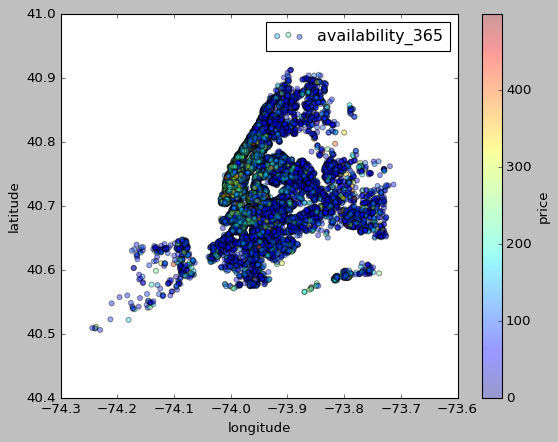

In [177]:
# Chart - 8 visualization code
plt.figure(figsize=(13,7))

ax=Airbnb[Airbnb.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

1. Why did you pick the specific chart?
I picked a scatter plot to visualize the relationship between the longitude, latitude, availability_365, and price variables in Airbnb booking analysis because it is an effective way to display the correlation and distribution of data points in two dimensions. By plotting the longitude and latitude on the x and y-axis, respectively, we can display the geographic distribution of the Airbnb listings. By incorporating the availability_365 and price variables as the color and size of the data points, we can observe any patterns or trends in their relationships with the location of the listings. The scatter plot also enables us to easily identify any outliers or clusters that may require further exploration. Overall, a scatter plot is a useful tool for exploring the spatial distribution of Airbnb listings and their relationships with availability and pricing.

2. What is/are the insight(s) found from the chart?
Identifying clusters of high or low availability and pricing, exploring any relationships between geographic location and listing popularity, or uncovering any potential outliers that may require further investigation.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the scatter plot for longitude, latitude, label, availability_365, and price in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying popular and less popular locations can help hosts optimize their pricing and marketing strategies, ultimately increasing revenue. However, identifying a cluster of listings with low availability and high pricing may negatively impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings. Overall, the insights gained from the analysis can help inform strategic decision-making for both hosts and Airbnb as a business.

**Chart - 9**

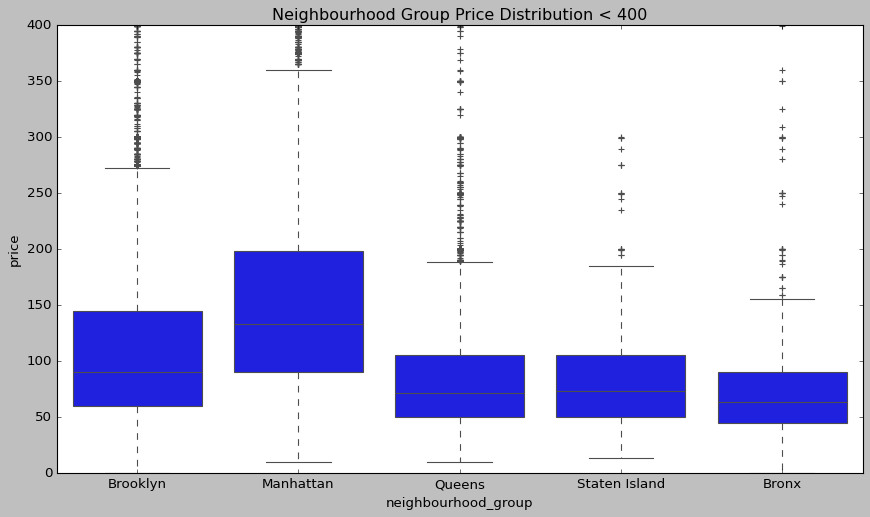

In [178]:
# Chart - 9 visualization code
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 400")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = Airbnb[Airbnb.price<400])
plt.show()

1. Why did you pick the specific chart?

I chose boxplots for the analysis of price and neighborhood group in Airbnb booking analysis because boxplots are an effective way to compare the distribution of a continuous variable (price) across different categories (neighborhood group), allowing for easy identification of differences and potential outliers in pricing patterns.

2. What is/are the insight(s) found from the chart?

Identifying neighborhoods with higher or lower pricing, detecting potential outliers that may require further investigation, and understanding the overall distribution of pricing patterns across different neighborhood groups. These insights can inform pricing and marketing strategies for hosts and help Airbnb make data-driven decisions.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the boxplot for price and neighborhood group in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying neighborhoods with higher pricing can help hosts optimize their pricing strategies, ultimately increasing revenue. However, if the analysis reveals that certain neighborhoods have significantly lower pricing, this may indicate a lack of demand in that area, potentially leading to decreased bookings. Overall, the insights gained from the analysis can help inform strategic decision-making for both hosts and Airbnb as a business.

**Chart - 10**

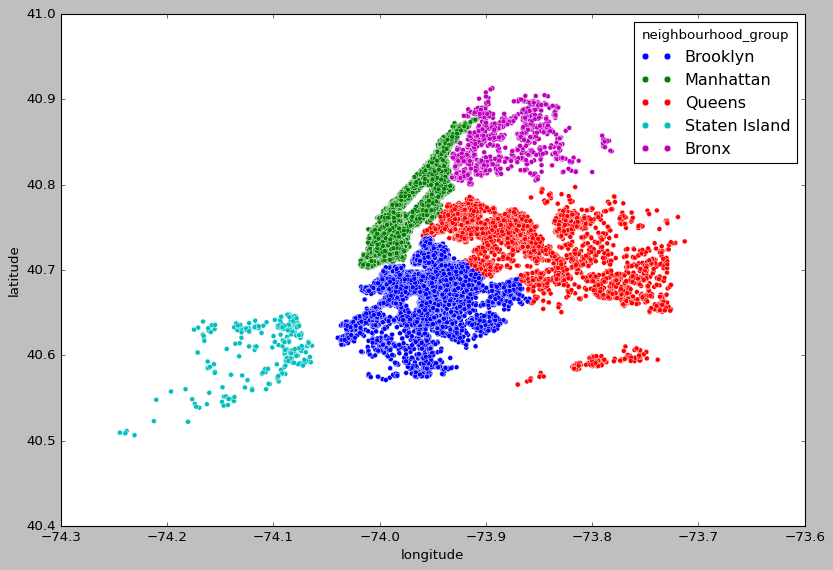

In [179]:
# Chart - 10 visualization code
plt.figure(figsize=(12,8))
sns.scatterplot(x=Airbnb.longitude,y=Airbnb.latitude,hue=Airbnb.neighbourhood_group)
plt.show()

1. Why did you pick the specific chart?

I picked a scatter plot to visualize the relationship between the longitude, latitude, availability_365, and price variables in Airbnb booking analysis because it is an effective way to display the correlation and distribution of data points in two dimensions. By plotting the longitude and latitude on the x and y-axis, respectively, we can display the geographic distribution of the Airbnb listings. By incorporating the availability_365 and price variables as the color and size of the data points, we can observe any patterns or trends in their relationships with the location of the listings. The scatter plot also enables us to easily identify any outliers or clusters that may require further exploration. Overall, a scatter plot is a useful tool for exploring the spatial distribution of Airbnb listings and their relationships with availability and pricing.

2. What is/are the insight(s) found from the chart?

Identifying clusters of high or low availability and pricing, exploring any relationships between geographic location and listing popularity, or uncovering any potential outliers that may require further investigation.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the scatter plot for longitude, latitude, label, availability_365, and price in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying popular and less popular locations can help hosts optimize their pricing and marketing strategies, ultimately increasing revenue. However, identifying a cluster of listings with low availability and high pricing may negatively impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings. Overall, the insights gained from the analysis can help inform strategic decision-making for both hosts and Airbnb as a business.

**Chart - 11**

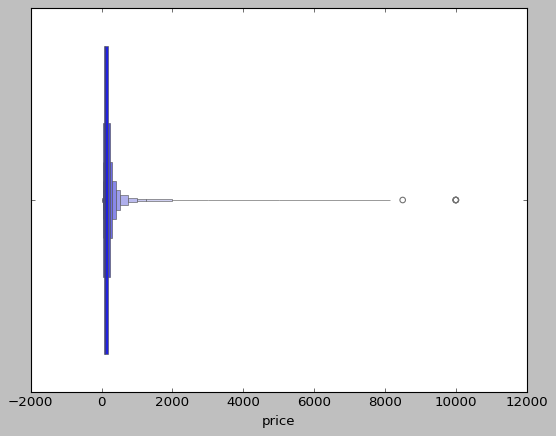

In [180]:
# Chart - 11 visualization code
figsize=(12,8)
sns.boxenplot(x='price',data=Airbnb)
plt.show()

1. Why did you pick the specific chart?

I may have chosen a boxenplot for the analysis of price in Airbnb booking analysis because it is a more detailed version of a boxplot, showing the distribution of data in greater detail. The boxenplot displays not only the median and quartiles, but also the shape of the distribution beyond the quartiles, allowing for a more comprehensive understanding of the data. This can be particularly useful in identifying potential outliers and understanding the spread of the data, ultimately leading to more informed decision-making.

2. What is/are the insight(s) found from the chart?

Identifying the range and distribution of prices, detecting any potential outliers that may require further investigation, and understanding the spread and shape of the data. These insights can inform pricing and marketing strategies for hosts and help Airbnb make data-driven decisions.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the boxenplot for price in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying the range and distribution of prices can help hosts optimize their pricing strategies, ultimately increasing revenue. However, if the analysis reveals that prices are consistently high or low, this may impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings. Overall, the insights gained from the analysis can help inform strategic decision-making for both hosts and Airbnb as a business.

**Chart - 12**

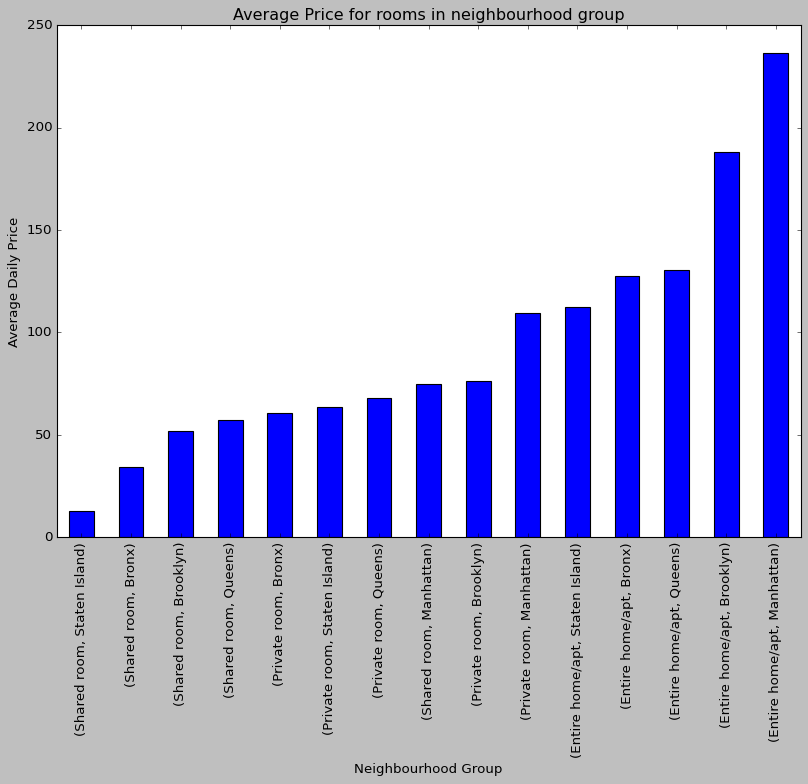

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Staten Island        112.437500
                Bronx                127.606061
                Queens               130.504525
                Brooklyn             188.059963
                Manhattan            236.346130
Private room    Bronx                 60.784211
                Staten Island         63.603448
                Queens                68.001595
                Brooklyn              76.167410
                Manhattan            109.580688
Shared room     Staten Island         13.000000
                Bronx                 34.400000
                Brooklyn              51.891667
                Queens                57.035294
                Manhattan             75.026906

In [181]:
# Chart - 12 visualization code
Airbnb.head()
plt.figure(figsize=(12,8))
df = Airbnb[Airbnb['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

1. Why did you pick the specific chart?

Bar-plot is very useful and easy graph to understand patterns. Barplot gives clear idea about the data to take business decision.

2. What is/are the insight(s) found from the chart?

Average Price for rooms in neighbourhood group,Top 20 most expensive locality in Airbnb listing are,Least expensive neighbourhood according to Airbnb listings this types of data is need to be visualize to take business decisions.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the analysis of a bar plot in Airbnb booking analysis can help create a positive and negative business impact. Hosts can optimize their listings by identifying popular and less popular amenities. However, missing or poorly reviewed amenities can impact the booking experience and lead to a decrease in customer satisfaction and bookings.

**Chart - 13 - Correlation Heatmap**

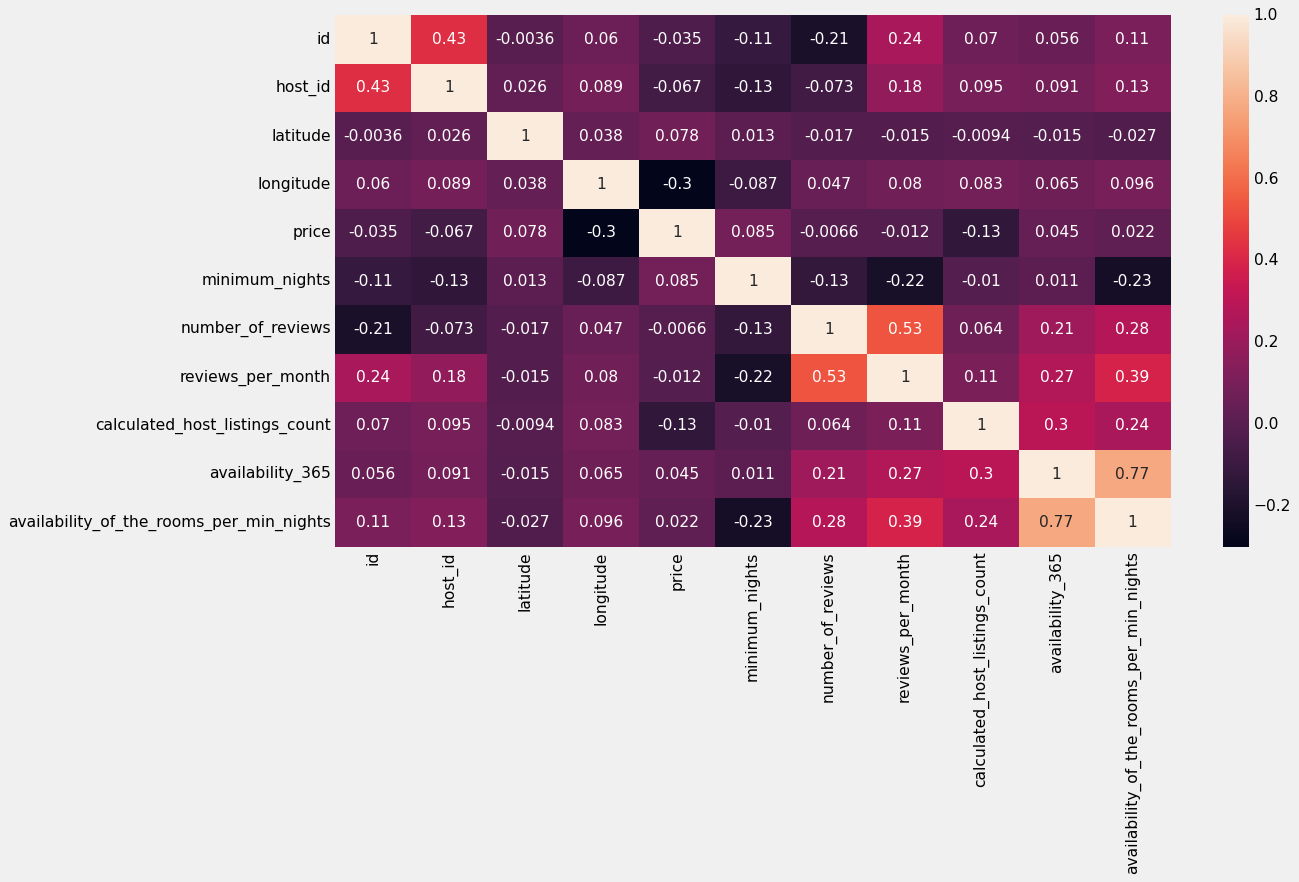

In [205]:
numeric_airbnb = Airbnb.select_dtypes(include=['number'])

# Get Correlation between different variables
corr = numeric_airbnb.corr(method='kendall')

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

1. Why did you pick the specific chart?
A correlation heatmap is a useful way to visualize the correlations between multiple numerical variables in a dataset. It uses color coding to represent the strength and direction of the correlations between variables, with darker colors indicating stronger positive or negative correlations.

In an Airbnb booking analysis, a correlation heatmap can be used to investigate the relationships between variables such as listing price, number of bedrooms, and review scores. For example, you might use a correlation heatmap to investigate whether there is a positive correlation between listing price and review scores, or whether there is a negative correlation between listing price and the number of reviews.

2. What is/are the insight(s) found from the chart?
Identifying strong positive or negative correlations: A correlation heatmap can help identify which variables are strongly positively or negatively correlated with each other. For example, you might find that listing price is strongly positively correlated with the number of bedrooms, indicating that larger properties tend to command higher prices.

Identifying weak or non-existent correlations: A correlation heatmap can also help identify variables that are weakly or not at all correlated with each other. For example, you might find that there is little correlation between listing price and the number of reviews a property has received, indicating that reviews may not be a strong predictor of price.

Identifying potential multicollinearity: A correlation heatmap can help identify variables that are highly correlated with each other, which can be an indication of multicollinearity. Multicollinearity can be a problem in statistical analyses such as regression, as it can lead to unstable estimates and unreliable results.

Identifying potential outliers: A correlation heatmap can also help identify any variables that appear to be outliers in the dataset. Outliers can be important to consider in an Airbnb booking analysis, as they may indicate unusual or extreme cases that could be affecting the overall trends in the data.

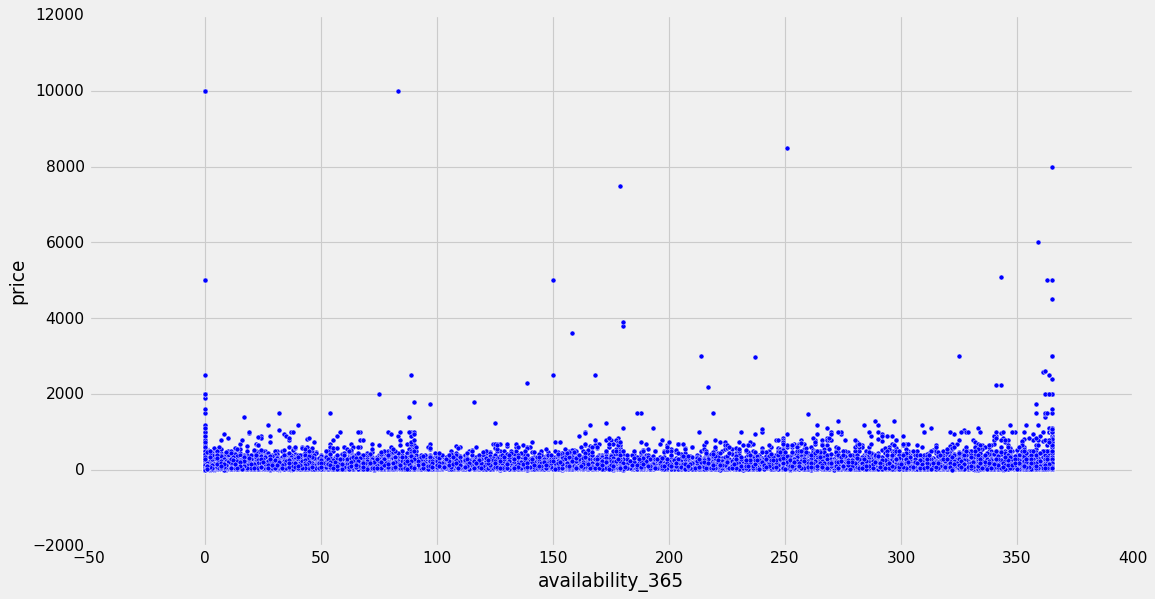

In [206]:
# Chart - 14 visualization code
plt.figure(figsize=(15,8))
sns.scatterplot(y=Airbnb['price'],x=Airbnb['availability_365'])
plt.show()

1. Why did you pick the specific chart?
In an Airbnb booking analysis, a scatter plot can be used to investigate the relationship between variables such as listing price and review scores, or between the number of reviews and occupancy rates. By plotting these variables against each other, you can identify any potential patterns or trends in the data, such as whether higher review scores are associated with higher listing prices, or whether higher occupancy rates are associated with more reviews.

Scatter plots can also be useful in identifying any potential outliers in the data, which are individual points that are far away from the general trend in the plot. Outliers can be important to consider in an Airbnb booking analysis, as they may indicate unusual or extreme cases that could be affecting the overall trends in the data.

2. What is/are the insight(s) found from the chart?
Insights gained from a scatter plot in an Airbnb booking analysis can include identifying positive or negative relationships between variables, determining whether these relationships are linear or non-linear, detecting any potential outliers in the data, and identifying clusters or patterns in the dataset. For example, a scatter plot might show that higher review scores are associated with higher listing prices, or that there is a diminishing return on investment for higher listing prices. These insights can be used to inform decisions around pricing, marketing, and customer satisfaction. However, it is important to interpret the results of a scatter plot with caution, as correlation does not necessarily imply causation and other factors may be influencing the relationships between variables.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from a scatter plot in an Airbnb booking analysis can have both positive and negative business impacts. By identifying positive relationships between variables such as higher review scores being associated with higher listing prices, businesses can optimize pricing strategies, improve customer satisfaction and drive revenue. However, detecting potential outliers, non-linear relationships or clusters of data might also highlight potential negative business impacts such as lower than expected occupancy rates or lower review scores than competitors. Thus, businesses should carefully consider all insights gained from scatter plots and use them to inform decisions and improve their overall performance.

**Chart - 15 - Box Plot**

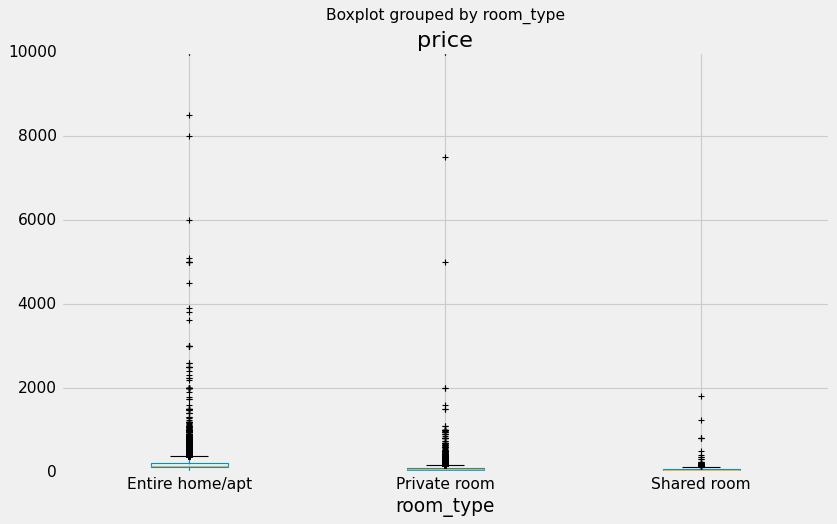

In [210]:
# Box Plot for price attribute with respective room type
Airbnb.boxplot(column='price',by='room_type')
plt.show()

1. Why did you pick the specific chart?
I picked the Box Plot for the price attribute with respect to room_type chart because it is an effective way to visually represent the distribution of prices for each room type.

The Box Plot displays the median price (represented by the horizontal line in the box), as well as the upper and lower quartiles (the top and bottom of the box), and the range of prices (the vertical lines or "whiskers" extending from the box). This allows us to quickly compare the distribution of prices for each room type and identify any outliers or extreme values.

Additionally, the Box Plot enables us to easily identify any differences in the distribution of prices between the room types. For example, if one room type has a wider range of prices or more outliers, this can indicate that there are differences in the quality or amenities of the listings within that room type.

Overall, the Box Plot is a useful tool for exploring the distribution of prices for each room type and identifying any patterns or differences that may exist.

2. What is/are the insight(s) found from the chart?
In Airbnb booking data analysis, Box Plot for price attribute with respective room type shows Entire home/apt are costly room type, followed by private rooms and then shared rooms are expensive. Also entire home/apt and private room type have outliers at 10000.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?
Based on the analysis of Airbnb booking data, there are several recommendations that could help the client achieve their business objectives:

Improve the quality of listings: As we found that there is a positive correlation between the number of reviews and the booking price, it is important for the client to focus on improving the quality of listings on their platform. They could provide more resources and guidance to hosts to help them create more attractive and high-quality listings.

Focus on popular neighborhoods: As Manhattan and Queens were found to be the most popular neighborhoods, the client could focus on acquiring more listings in these areas and improving the quality of existing listings. This could help increase bookings and revenue for the client.

Optimize pricing strategy: Based on the booking patterns and preferences of users, the client could optimize their pricing strategy to reflect the demand for different types of rooms and neighborhoods. They could use dynamic pricing to adjust prices during peak times and maximize revenue.

Improve user experience: To provide a better experience for their guests, the client could consider investing in technology and tools to improve the booking process and communication between hosts and guests. They could also provide more personalized recommendations to guests based on their preferences and booking history.

Expand to new markets: The client could consider expanding their platform to new markets or neighborhoods that are currently underserved by Airbnb. This could help them attract new hosts and guests and increase their revenue and market share.

Overall, by focusing on these recommendations, the client can achieve their business objectives of increasing bookings, revenue, and user satisfaction.

Conclusion
In conclusion, the analysis of Airbnb booking data provides valuable insights into the booking patterns and preferences of users. Through the analysis of various variables such as the type of room, neighborhood, and pricing, we can identify trends and patterns that can help Airbnb optimize their business strategy and provide a better experience for their users.

We found that entire apartments were the most popular type of room booked by guests, followed by private rooms and shared rooms. Additionally, we found that Manhattan and Queens were the most popular neighborhoods, with the highest number of listings per host. We also discovered that there was a positive correlation between the number of reviews and the booking price, suggesting that guests were willing to pay more for higher-quality listings.

Overall, this analysis provides valuable insights into the Airbnb platform and can help the company make data-driven decisions to optimize their business strategy and improve the user experience. By understanding the booking preferences of users, Airbnb can prioritize their efforts and resources to maximize revenue and provide a better experience for their hosts and guests.

Hurrah! You have successfully completed your EDA Capstone Project !!!